In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import lru_cache, partial
import math
from collections import namedtuple
from tqdm.auto import tqdm, trange
from solver import load_data, view_tsp, loss, to_nearest, distance
from collections import defaultdict
from ant_colony import (
    make_distance_matrix,
    run_ant_colony,
    random_route,
    plot_history,
)
from solver import (
    two_opt_v2,
    three_opt,
    randomized_opt2,
    two_opt,
    local_search,
)

Point = namedtuple("Point", ["x", "y"])


# def eucl_dist(self, point):
#     return ((self.x - point.x) ** 2 + (self.y - point.y) ** 2) ** 0.5


# Point.__sub__ = eucl_dist

ls = os.listdir
join = os.path.join

<IPython.core.display.Javascript object>

In [3]:
n, points = load_data("tsp_100_3")

# n = 50
# points = generate_tsp(n, 12)

dist = make_distance_matrix(points)
phermones = None

#Nodes: 100


<IPython.core.display.Javascript object>

In [4]:
best_solution, phermones, history = run_ant_colony(
    points,
    phermones=phermones,
    trials=2000,
    q=1,
    evaporation=0.05,
    offset=0,
    alpha=1,
    beta=1,
)

<IPython.core.display.Javascript object>

[0, 12, 93, 15, 97, 33, 60, 1, 45, 36, 46, 30, 94, 82, 49, 23, 6, 85, 63, 48, 68, 41, 59, 42, 98, 67, 78, 86, 10, 75, 27, 31, 58, 56, 81, 73, 95, 61, 89, 76, 34, 28, 62, 16, 80, 96, 55, 3, 24, 71, 57, 66, 74, 39, 83, 7, 47, 37, 77, 88, 87, 20, 5, 54, 92, 35, 99, 21, 32, 11, 44, 43, 40, 64, 50, 2, 53, 9, 18, 52, 22, 8, 90, 38, 70, 72, 84, 51, 17, 79, 26, 29, 14, 13, 69, 4, 91, 65, 25, 19]


C:\Users\pooya\Codes\discrete-optim\4 tsp\ant_colony.py:34: RuntimeWarning: divide by zero encountered in true_divide
  weights = phermones ** alpha / distances ** beta


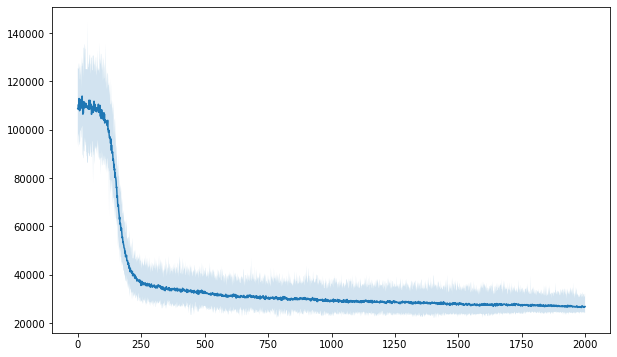

<IPython.core.display.Javascript object>

In [5]:
route = random_route(dist, phermones, alpha=1, beta=1)
print(route)
plot_history(history)

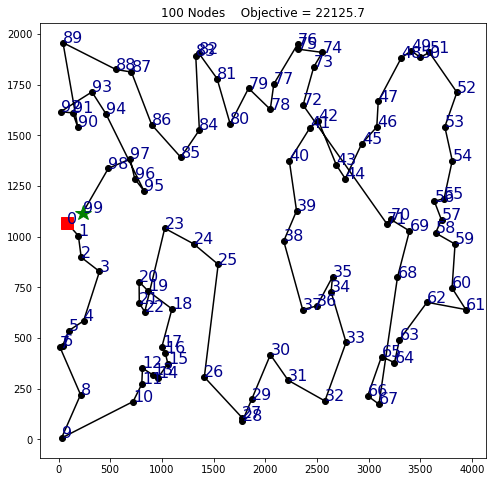

<IPython.core.display.Javascript object>

In [6]:
view_tsp(best_solution, points, show_index=True)


	* local search: Iteration #1


	21381.89 --> 21378.78
	21378.78 --> 21310.88
	21310.88 --> 21297.80

	* local search: Iteration #2



No improvement observed.


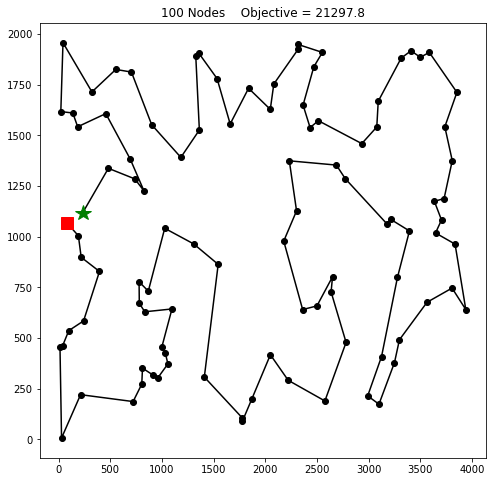

<IPython.core.display.Javascript object>

In [7]:
refined = three_opt(best_solution, points)
refined = local_search(refined, points)
view_tsp(refined, points, show_index=False)

C:\Users\pooya\Codes\discrete-optim\4 tsp\ant_colony.py:34: RuntimeWarning: divide by zero encountered in true_divide
  weights = phermones ** alpha / distances ** beta


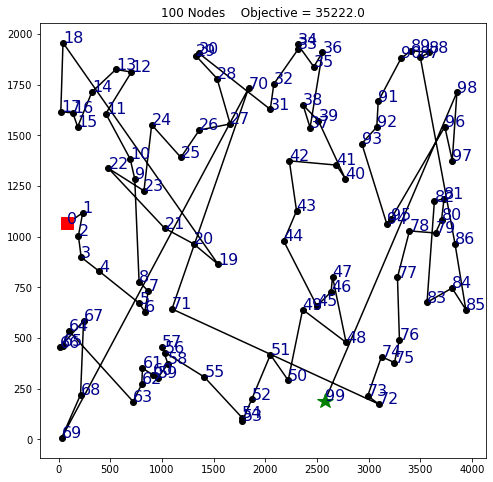

<IPython.core.display.Javascript object>

In [47]:
route = random_route(dist, phermones, alpha=0.1, beta=5)
view_tsp(route, points, show_index=True)